# 1. Import Library

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料預處理

In [2]:
(x_Train, y_Train), (x_Test, y_Test) = mnist.load_data()

In [3]:
x_Train4D=x_Train.reshape(x_Train.shape[0],28,28,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],28,28,1).astype('float32')

In [4]:
x_Test.shape[0]

10000

(幾張圖片,28,28,灰階)   


In [5]:
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255

In [6]:
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

# 建立模型

In [7]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [8]:
model = Sequential()


In [9]:
model.add(Conv2D(filters=25,         #filter就是
                 kernel_size=(3,3),  #3*3的filter
                 padding='same',     
                 input_shape=(28,28,1),  
                 activation='relu'))    

In [10]:
model.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
model.add(Conv2D(filters=50,
                 kernel_size=(3,3),
                 padding='same',
                 activation='relu'))

In [12]:
model.add(MaxPooling2D(pool_size=(2, 2)))

在此之上已經疊了4層

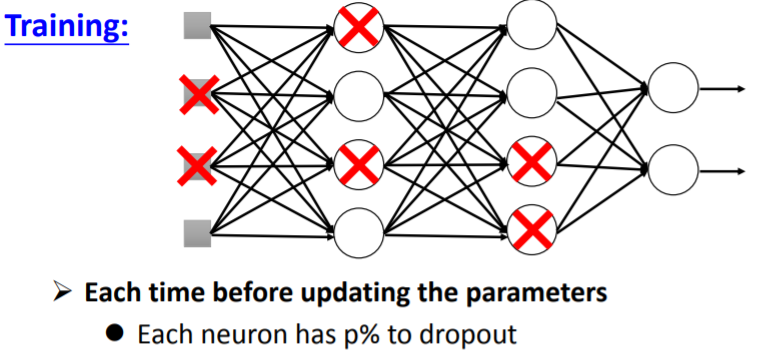

In [13]:
from IPython.display import Image

Image(filename='./image/dropout.png', width=600)  #避免overfitting

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(Flatten()) #拉直成一個向量在胃入全連接層

In [16]:
model.add(Dense(100, activation='relu'))

In [17]:
model.add(Dropout(0.5))

In [18]:
model.add(Dense(10,activation='softmax'))

In [19]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 25)        250       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 25)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        11300     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               245100    
__________

# 訓練模型

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 

In [21]:
train_history=model.fit(x=x_Train4D_normalize, 
                        y=y_TrainOneHot,validation_split=0.2, 
                        epochs=2, batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
29s - loss: 0.5595 - acc: 0.8269 - val_loss: 0.1080 - val_acc: 0.9690
Epoch 2/2
29s - loss: 0.1626 - acc: 0.9514 - val_loss: 0.0680 - val_acc: 0.9792


# 評估模型準確率

In [22]:
scores = model.evaluate(x_Test4D_normalize , y_TestOneHot)
scores[1]

10000/10000 [==============================] - 2s     

0.98089999999999999

# 預測結果

In [23]:
prediction=model.predict_classes(x_Test4D_normalize)

 9952/10000 [============================>.] - ETA: 0s

In [24]:
prediction[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64)

# confusion matrix

In [25]:
import pandas as pd
pd.crosstab(y_Test,prediction,
            rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,974,0,0,0,0,0,2,2,2,0
1,0,1127,3,0,0,1,1,1,2,0
2,2,0,1010,2,1,0,0,9,8,0
3,0,0,5,982,0,10,0,6,6,1
4,0,1,1,0,966,0,1,2,2,9
5,2,0,1,4,0,881,2,1,1,0
6,7,2,0,1,1,2,940,0,5,0
7,1,0,11,2,1,0,0,1007,3,3
8,3,1,2,3,2,5,1,4,947,6
